# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

I'll be doing a web-scrapping for the **10 biggest U.S box office movies** based on website https://www.imdb.com/. What I'm about to do might be different than the actual task given by the instructor, but the information list that'll be filtered are similar (**title** , **imdb rating** , **metascore**, and **votes**) with an addition of **Gross-rate** per title.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31&sort=boxoffice_gross_us,desc')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"lxml")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

In [4]:
table = soup.find('div', attrs={'class':'lister list detail sub-list'})
print(table.prettify()[1:500])

div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt10872600">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt10872600/">
     <img alt="Spider-Man: No Way Home" class="loadlate" data-tconst="tt10872600" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZWMyYzFjYTYtNTRjYi00OGExLWE2Yzg


Finding row length to check if the class we select have the same length as the total titles per page, which is 50 per page.

In [5]:
row = table.find_all('div', attrs={'class':'lister-item mode-advanced'})
row_length = len(row)

In [6]:
row_length

50

Do the scrapping process here. However, since we only taking the top 10 from the entire title list and imdb already has a filter to order the titles by their gross-rate. We will use **range(0,10)** instead of the row_length.

In [7]:
soup.find_all('div', attrs={'class':'inline-block ratings-metascore'})[1:3]

[<div class="inline-block ratings-metascore">
 <span class="metascore favorable">71        </span>
         Metascore
             </div>,
 <div class="inline-block ratings-metascore">
 <span class="metascore mixed">49        </span>
         Metascore
             </div>]

As we can see, the class of 'metascore' are slightly different based on the score that they have. 
- **>60 score** will be labelled as _metascore favorable_
- **40>score<60** will be labelled as _metascore fixed_

So for easier extraction, I'll change each element into strings and extract the integer using re.findall() method.

In [8]:
# For metascore list
import re
list_metascore = [] #to store the score

for i in range(0,10):
    # 
    meta = str(soup.find_all('div', attrs={'class':'inline-block ratings-metascore'})[i])
    list_metascore.append(re.findall(r'\b\d+\b', meta)[0])

list_metascore

['71', '71', '49', '67', '58', '52', '49', '68', '62', '74']

Rather than using .find_all() method, I'll use .select() instead for easier indexing.

In [9]:
#For other information lists
list_title = []
list_rating = []
list_vote = []
list_gross = []

for i in range(0,10):
    products = soup.select(".lister-item.mode-advanced")
    title = products[i].select('a')[1].text
    list_title.append(title)

for i in range(0,10):
    products = soup.select(".lister-item.mode-advanced")
    rating = products[i].select('strong')[0].text
    list_rating.append(rating)

for i in range(0,10):
    products = soup.select(".sort-num_votes-visible")
    votes = products[i].select('span')[1].text
    list_vote.append(votes)

for i in range(0,10):
    products = soup.select(".sort-num_votes-visible")
    gross = products[i].select('span')[4]['data-value']
    list_gross.append(gross)   

title , imdb rating , metascore, and votes

In [10]:
temp = list(zip(list_title,list_rating,list_metascore,list_vote,list_gross))
temp

[('Spider-Man: No Way Home', '8.3', '71', '673,707', '804,747,988'),
 ('Shang-Chi and the Legend of the Ten Rings',
  '7.4',
  '71',
  '361,190',
  '224,543,292'),
 ('Venom: Let There Be Carnage', '5.9', '49', '209,647', '213,550,366'),
 ('Black Widow', '6.7', '67', '358,818', '183,651,655'),
 ('F9', '5.2', '58', '126,221', '173,202,780'),
 ('Eternals', '6.3', '52', '318,599', '164,870,234'),
 ('Sing 2', '7.4', '49', '55,767', '162,790,990'),
 ('No Time to Die', '7.3', '68', '373,258', '160,869,031'),
 ('Free Guy', '7.1', '62', '348,953', '121,626,598'),
 ('Dune: Part One', '8.0', '74', '588,179', '108,327,830')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
import pandas as pd

df = pd.DataFrame(temp,columns=('Title','Rating','Metascore','Votes','Gross($)'))
df.dtypes

Title        object
Rating       object
Metascore    object
Votes        object
Gross($)     object
dtype: object

Since all the data types are still in object, we have to change them to the supposed type.

In [12]:
df['Title'] = df['Title'].astype('str')
df['Rating'] = df['Rating'].astype('float64')
df['Metascore'] = df['Metascore'].astype('int64')
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].astype('int64')
df['Gross($)'] = df['Gross($)'].str.replace(',','')
df['Gross($)'] = df['Gross($)'].astype('int64')

In [13]:
df.dtypes

Title         object
Rating       float64
Metascore      int64
Votes          int64
Gross($)       int64
dtype: object

In [14]:
df.head()

,Title,Rating,Metascore,Votes,Gross($)
0,Spider-Man: No Way Home,8.3,71,673707,804747988
1,Shang-Chi and the Legend of the Ten Rings,7.4,71,361190,224543292
2,Venom: Let There Be Carnage,5.9,49,209647,213550366
3,Black Widow,6.7,67,358818,183651655
4,F9,5.2,58,126221,173202780


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 12

Text(0.5, 1.0, 'Gross($)')

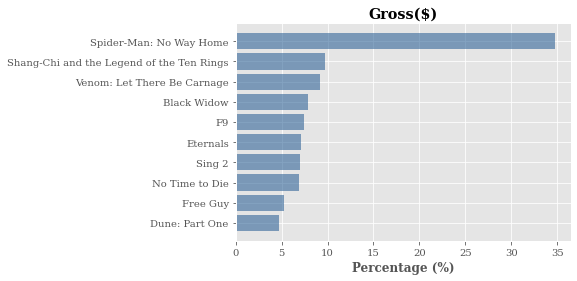

In [16]:
plt.style.use('ggplot')
df_percent = pd.crosstab(index=df['Title'],columns='Gross($)',values=df['Gross($)'],aggfunc='sum',normalize=True).\
            sort_values(by='Gross($)',ascending=False)*100

X = df_percent.index[::-1]
Y = df_percent['Gross($)'][::-1]
plt.barh(X ,Y, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("Percentage (%)", fontweight='bold')                                                    
plt.title("Gross($)", fontweight='bold')

## Conclusion 1
Based on the plot above, **Spider-Man: No Way Home** almost take about 35% of total _Top 10 U.S Box-Office Grossing_.

-------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Votes')

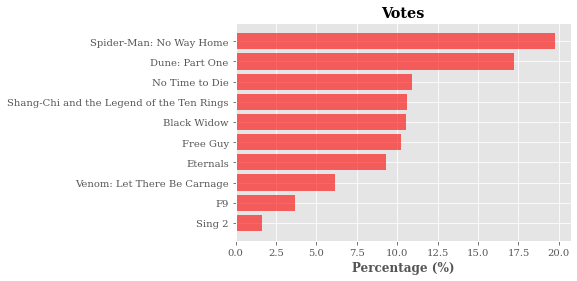

In [17]:
df_votes = pd.crosstab(index=df['Title'],columns='Votes',values=df['Votes'],aggfunc='sum',normalize=True).\
            sort_values(by='Votes',ascending=False)*100

X2 = df_votes.index[::-1]
Y2 = df_votes['Votes'][::-1]
plt.barh(X2 ,Y2, color='red', alpha=0.6)
plt.xlabel("Percentage (%)", fontweight='bold')                                                    
plt.title("Votes", fontweight='bold')

## Conclusion 2

However, in contrast with by its _Gross%_ value, we can see that **Dune: Part One** has the second-highest _Votes_ count percentage with almost 17,5%.

This might be because Dune's late popularity that has increased after the movie won 6 Oscar's Prizes followed by its availability in multiple streaming platforms.(https://www.townandcountrymag.com/leisure/arts-and-culture/a39016301/how-to-watch-dune-timothee-chalamet/)

-------------------------------------------------------------------------------------------------------------------------------

To make sure, we can see the Rating between Viewers and Reputed Critics (_Metascore_)

In [18]:
import warnings
warnings.filterwarnings('ignore')

#Since Rating and Metascore have a different values, we will convert Rating's value to match the Metascore's value
temp_r = list(zip(list_title,list_rating,list_metascore))
df2 = pd.DataFrame(temp_r,columns=('Title','Rating','Metascore'))
df2['Rating'] = df2['Rating'].str.replace('.','')
df2['Rating'] = df2['Rating'].astype('int64')
df2['Metascore'] = df2['Metascore'].astype('int64')

Text(0, 0.5, '')

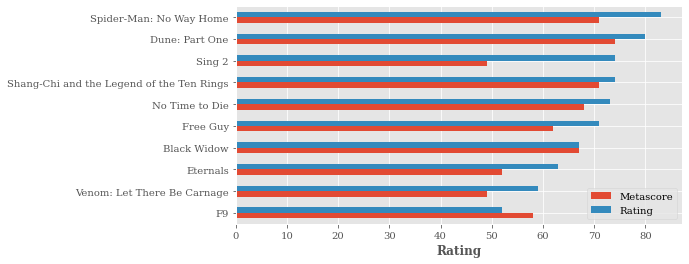

In [19]:
df_rating = df2.groupby('Title').sum()[['Metascore','Rating']].sort_values(by='Rating',ascending=True)
df_rating.plot.barh(figsize=(8,4))
plt.xlabel("Rating", fontweight='bold')
plt.ylabel('')

## Conclusion 3

To answers the hypothesis of Votes-Rating relationship of **Dune: Part One**, we can see that Dune has the highest Rating (74) from the Reputed Critics and highly favourable within Viewers (with the second highest Viewer's Rating).